Importando pacotes e baixando banco de dados disponibilizado pela CVM

In [60]:
import pandas as pd
pd.set_option("display.max_columns", None)

#rom google_drive_downloader import GoogleDriveDownloader as gdd


#google_id_1 = '1J0fF-82tDg70wjaNg2Q8OGxPikA7phqp'
#google_id_2 = '1KbzST59EezMXV689PpWnW7qwdGAI07-y'
#google_id_3 = '1teoxduT3bJAkrD0k1YIPn-mbVI83oQox'

#gdd.download_file_from_google_drive(file_id=google_id_1,
#                                    dest_path = './IM_Classes_230626_semNP.csv',
#                                    showsize = True)
#gdd.download_file_from_google_drive(file_id=google_id_2,
#                                    dest_path = './IM_Cedente_230626_semNP.csv',
#                                    showsize = True)
#gdd.download_file_from_google_drive(file_id=google_id_3,
#                                    dest_path = './IM_230626_semNP.csv',
#                                    showsize = True) """

In [61]:
df1 = pd.read_csv('.\Banco_de_dados\IM_Classes_230626_semNP.csv')
df2 = pd.read_csv('.\Banco_de_dados\IM_230626_semNP.csv')
df3 = pd.read_csv('.\Banco_de_dados\IM_230626_semNP.csv')

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [62]:
df1 = df1.dropna().drop_duplicates()
df2 = df2.dropna().drop_duplicates()
df3 = df3.dropna().drop_duplicates()

In [63]:
Colunas_2_Quero = ['SK_Documento', 'CNPJ_Administrador', 'Nome_Administrador', 
                   'Fundo_Exclusivo', 'Cotistas_Vinculados_Interesse', 'Ativo', 
                   'Ativo_Disponibilidades', 'Ativo_Carteira', 'Ativo_Direitos_Aquisicao', 
                   'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes', 'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes', 
                   'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais', 'Ativo_Direitos_Sem_Aquisicao',
                   'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Adimplentes', 
                   'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Inadimplentes', 
                   'Ativo_Valores_Mobiliarios', 'Patrimonio_Liquido', 'Liquidez_Ate_30_Dias', 
                   'Liquidez_Ate_60_Dias', 'Liquidez_Ate_90_Dias', 'Liquidez_Ate_180_Dias', 'Liquidez_Ate_360_Dias',
                   'Liquidez_Acima_360_Dias', 'Taxas_Direitos_Sem_Aquisicao_Juros_Compra_Minina', 
                   'Taxas_Direitos_Aquisicao_Juros_Compra_Minina',  'Taxas_Direitos_Sem_Aquisicao_Juros_Compra_Maxima', 
                   'Carteira', 'Carteira_Comercial', 'Carteira_Servicos', 'Carteira_Financeiro', 
                   'Carteira_Mercado_Imobiliario', 'Prazo_Conversao_Cotas', 'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes', 
                   'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes', 'Data_Competencia', 'Ativo_Provisao_Cotas_FIDC',
                   'Ativo_Direitos_Sem_Aquisicao_Creditos_Fator_Risco'
                   ]

In [64]:
todas_colunas2 = list(df2.columns)
for coluna in todas_colunas2:
    if coluna not in Colunas_2_Quero:
        df2 = df2.drop(coluna,axis=1)

In [65]:
Colunas_3_Quero = []

In [66]:
todas_colunas3 = list(df3.columns)
for coluna in todas_colunas3:
    if coluna not in Colunas_3_Quero:
        df3 = df3.drop(coluna,axis=1)

In [67]:
Colunas_1_Quero = ['SK_Documento', 'Classe_Serie', 'Numero_Cotistas', 'Rentabilidade', 'Valor_Total_Captado', 'Valor_Total_Resgates']


In [68]:
todas_colunas1 = list(df1.columns)
for coluna in todas_colunas1:
    if coluna not in Colunas_1_Quero:
        df1 = df1.drop(coluna,axis=1)

df1 = df1.drop("Classe_Serie",axis=1)

In [69]:
df1 = df1.groupby("SK_Documento").mean()

In [70]:
df = pd.merge(df1,df2, on='SK_Documento', how="right")
df = df.drop("Nome_Administrador",axis=1)
df = df.drop("CNPJ_Administrador",axis=1)
df = df.drop("SK_Documento",axis=1)
df

,Numero_Cotistas,Rentabilidade,Valor_Total_Captado,Valor_Total_Resgates,Data_Competencia,Fundo_Exclusivo,Cotistas_Vinculados_Interesse,Prazo_Conversao_Cotas,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes,Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais,Ativo_Direitos_Sem_Aquisicao,Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Adimplentes,Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Inadimplentes,Ativo_Direitos_Sem_Aquisicao_Creditos_Fator_Risco,Ativo_Valores_Mobiliarios,Ativo_Provisao_Cotas_FIDC,Carteira,Carteira_Mercado_Imobiliario,Carteira_Comercial,Carteira_Servicos,Carteira_Financeiro,Patrimonio_Liquido,Taxas_Direitos_Aquisicao_Juros_Compra_Minina,Taxas_Direitos_Sem_Aquisicao_Juros_Compra_Minina,Taxas_Direitos_Sem_Aquisicao_Juros_Compra_Maxima,Liquidez_Ate_30_Dias,Liquidez_Ate_60_Dias,Liquidez_Ate_90_Dias,Liquidez_Ate_180_Dias,Liquidez_Ate_360_Dias,Liquidez_Acima_360_Dias
0,0.500000,0.000000,0.000000e+00,0.000000e+00,2020-11-30,Não,Não,0.0,1.999341e+09,0.00,1.999335e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998704e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.500000,0.000000,0.000000e+00,0.000000e+00,2020-12-31,Não,Não,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500000,0.000000,0.000000e+00,0.000000e+00,2021-01-31,Não,Não,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.000000,0.000000e+00,0.000000e+00,2021-02-28,Não,Não,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500000,0.000000,0.000000e+00,0.000000e+00,2021-03-31,Não,Não,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,1.000000,2.403333,0.000000e+00,0.000000e+00,2023-01-31,Não,Não,1.0,1.861834e+07,1456647.58,1.716169e+07,0.0,0.0,0.0,0.0,0.0,16844952.62,11508876.07,0.0,0.0,0.00,0.0,17037554.55,0.0,5347730.19,0.0,0.0,1.853897e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,1.000000,1.683333,0.000000e+00,0.000000e+00,2023-02-28,Não,Não,1.0,1.897822e+07,225314.88,1.875264e+07,0.0,0.0,0.0,0.0,0.0,18432641.03,9459200.66,0.0,0.0,0.00,0.0,18544364.80,0.0,5140930.18,0.0,0.0,1.893773e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6619,1.000000,2.683333,1.416667e+06,1.333333e+06,2023-03-31,Não,Não,1.0,1.992995e+07,164243.67,1.976571e+07,0.0,0.0,0.0,0.0,0.0,19442162.33,17475742.78,0.0,0.0,0.00,0.0,19767069.60,0.0,6425038.71,0.0,0.0,1.988450e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6620,1.666667,-0.036667,5.000000e+04,0.000000e+00,2023-04-30,Não,Não,1.0,1.994164e+07,535910.46,1.940549e+07,0.0,0.0,0.0,0.0,0.0,17971150.64,13884561.53,0.0,0.0,1108101.40,0.0,18533830.42,0.0,5794820.29,0.0,0.0,1.985800e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df = pd.get_dummies(df, columns=['Fundo_Exclusivo'])
df = pd.get_dummies(df, columns=['Cotistas_Vinculados_Interesse'])
df

,Numero_Cotistas,Rentabilidade,Valor_Total_Captado,Valor_Total_Resgates,Data_Competencia,Prazo_Conversao_Cotas,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes,Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Inadimplentes,Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais,Ativo_Direitos_Sem_Aquisicao,Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Adimplentes,Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Inadimplentes,Ativo_Direitos_Sem_Aquisicao_Creditos_Fator_Risco,Ativo_Valores_Mobiliarios,Ativo_Provisao_Cotas_FIDC,Carteira,Carteira_Mercado_Imobiliario,Carteira_Comercial,Carteira_Servicos,Carteira_Financeiro,Patrimonio_Liquido,Taxas_Direitos_Aquisicao_Juros_Compra_Minina,Taxas_Direitos_Sem_Aquisicao_Juros_Compra_Minina,Taxas_Direitos_Sem_Aquisicao_Juros_Compra_Maxima,Liquidez_Ate_30_Dias,Liquidez_Ate_60_Dias,Liquidez_Ate_90_Dias,Liquidez_Ate_180_Dias,Liquidez_Ate_360_Dias,Liquidez_Acima_360_Dias,Fundo_Exclusivo_Não,Fundo_Exclusivo_Sim,Cotistas_Vinculados_Interesse_Não,Cotistas_Vinculados_Interesse_Sim
0,0.500000,0.000000,0.000000e+00,0.000000e+00,2020-11-30,0.0,1.999341e+09,0.00,1.999335e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998704e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
1,0.500000,0.000000,0.000000e+00,0.000000e+00,2020-12-31,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2,0.500000,0.000000,0.000000e+00,0.000000e+00,2021-01-31,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
3,0.500000,0.000000,0.000000e+00,0.000000e+00,2021-02-28,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,0.500000,0.000000,0.000000e+00,0.000000e+00,2021-03-31,0.0,1.999294e+09,0.00,1.999294e+09,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1.998632e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,1.000000,2.403333,0.000000e+00,0.000000e+00,2023-01-31,1.0,1.861834e+07,1456647.58,1.716169e+07,0.0,0.0,0.0,0.0,0.0,16844952.62,11508876.07,0.0,0.0,0.00,0.0,17037554.55,0.0,5347730.19,0.0,0.0,1.853897e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
6618,1.000000,1.683333,0.000000e+00,0.000000e+00,2023-02-28,1.0,1.897822e+07,225314.88,1.875264e+07,0.0,0.0,0.0,0.0,0.0,18432641.03,9459200.66,0.0,0.0,0.00,0.0,18544364.80,0.0,5140930.18,0.0,0.0,1.893773e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
6619,1.000000,2.683333,1.416667e+06,1.333333e+06,2023-03-31,1.0,1.992995e+07,164243.67,1.976571e+07,0.0,0.0,0.0,0.0,0.0,19442162.33,17475742.78,0.0,0.0,0.00,0.0,19767069.60,0.0,6425038.71,0.0,0.0,1.988450e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
6620,1.666667,-0.036667,5.000000e+04,0.000000e+00,2023-04-30,1.0,1.994164e+07,535910.46,1.940549e+07,0.0,0.0,0.0,0.0,0.0,17971150.64,13884561.53,0.0,0.0,1108101.40,0.0,18533830.42,0.0,5794820.29,0.0,0.0,1.985800e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [72]:
Filtro1_df = pd.DataFrame(df)
Filtro1_df.to_csv('dados_tratados_bru.csv', index=False)


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

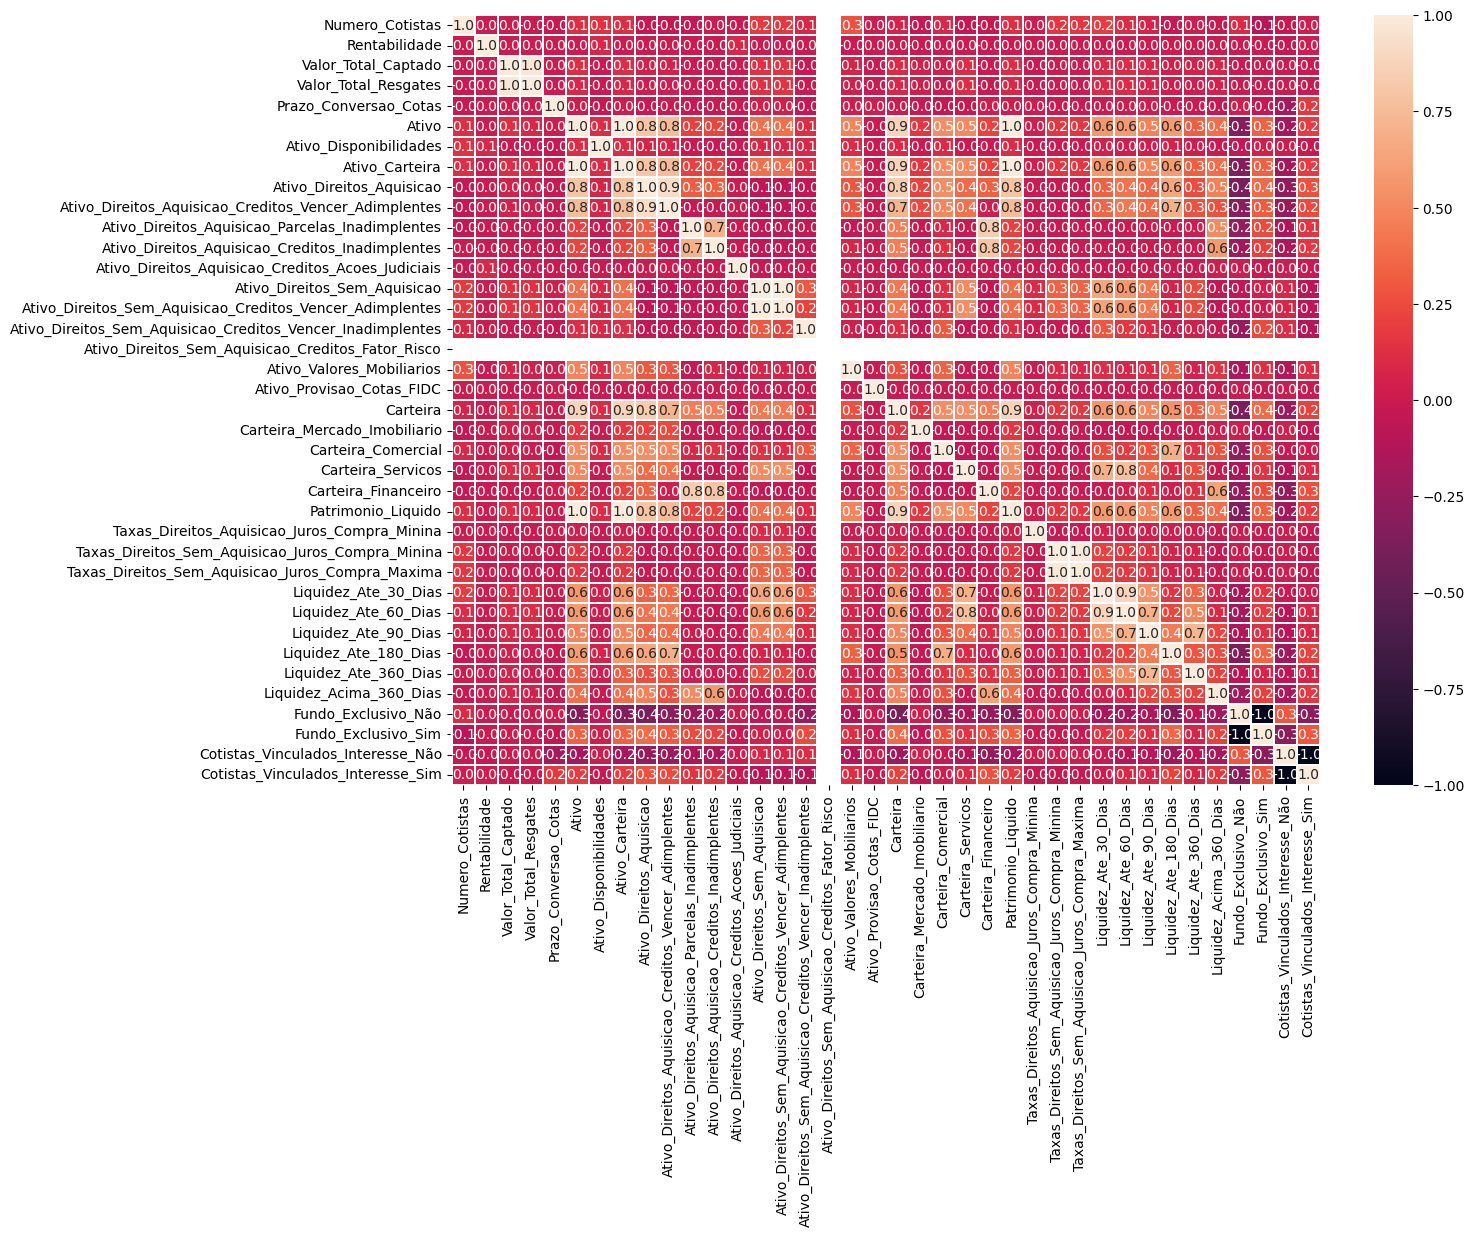

In [74]:
correlation = df.corr()
plt.figure(figsize=(14, 10))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.1)
plot

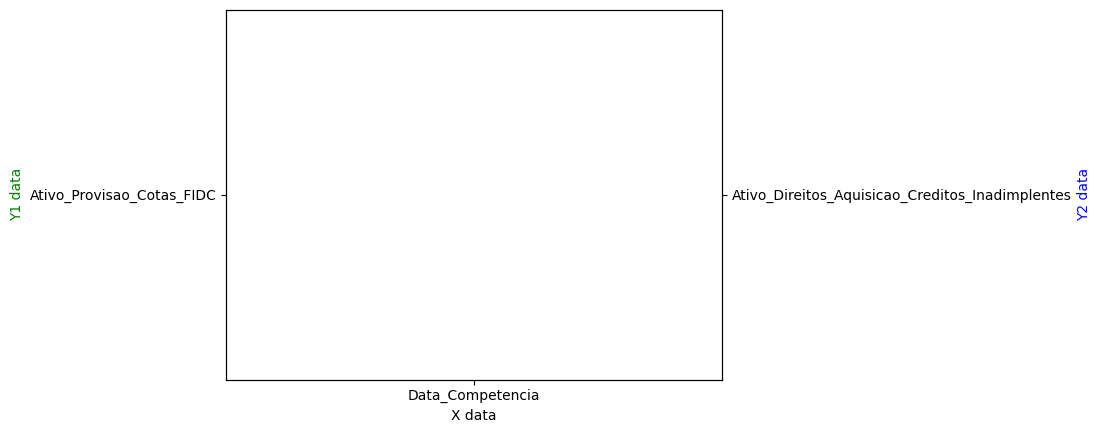

In [75]:
import numpy as np
x = ['Data_Competencia']
y1 = ['Ativo_Provisao_Cotas_FIDC']
y2 = ['Ativo_Direitos_Aquisicao_Creditos_Inadimplentes']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

